In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
movies_df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Preprocessing

In [5]:
movies_df['Year'] = movies_df['Year'].str.extract(r'(\d{4})')
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')

In [6]:
movies_df['Duration'] = pd.to_numeric(
    movies_df['Duration'].str.replace('min', '').str.strip(), errors='coerce')

In [7]:
movies_df['Votes'] = pd.to_numeric(
    movies_df['Votes'].str.replace(',', ''), errors='coerce')

In [8]:
for col in ['Year', 'Duration', 'Votes', 'Rating']:
    movies_df[col].fillna(movies_df[col].median(), inplace=True)

C:\Users\msnhp\AppData\Local\Temp\ipykernel_13008\954581806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df[col].fillna(movies_df[col].median(), inplace=True)
C:\Users\msnhp\AppData\Local\Temp\ipykernel_13008\954581806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    movies_df[col].fillna('Unknown', inplace=True)

C:\Users\msnhp\AppData\Local\Temp\ipykernel_13008\2199113903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df[col].fillna('Unknown', inplace=True)


## Encode Categorical Variables

In [10]:
label_encoders = {}

In [11]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    movies_df[col] = le.fit_transform(movies_df[col])
    label_encoders[col] = le

## Feature Engineering

In [12]:
movies_df['Director_Success'] = movies_df.groupby('Director')['Rating'].transform('mean')

In [13]:
movies_df['Genre_Avg_Rating'] = movies_df.groupby('Genre')['Rating'].transform('mean')

## Model Training

In [14]:
features = ['Year', 'Duration', 'Votes', 'Genre', 'Director_Success', 'Genre_Avg_Rating']
target = 'Rating'

In [15]:
X = movies_df[features]
y = movies_df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
joblib.dump(model, 'models/imdb_rating_model.pkl')

['models/imdb_rating_model.pkl']

## Evaluation

In [19]:
y_pred = model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.31
MSE: 0.34
R² Score: 0.65


## Visualization

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/prediction_vs_actual.png'

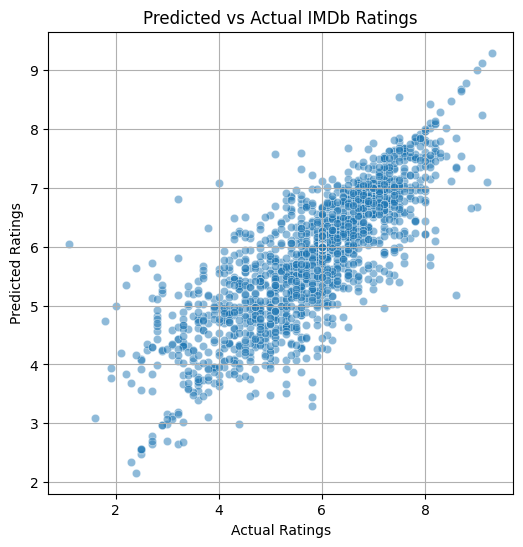

In [22]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual IMDb Ratings')
plt.grid(True)
plt.savefig('outputs/prediction_vs_actual.png')
plt.show()

## Metrics

In [24]:
with open("outputs/metrics.txt", "w") as f:
    f.write(f"MAE: {mae:.2f}\n")
    f.write(f"MSE: {mse:.2f}\n")
    f.write(f"R² Score: {r2:.2f}\n")